# **Load Data**

In [ ]:
# import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset from your own drive folder

df = pd.read_csv('/content/drive/My Drive/datasets_example/Dataset1_Customer_Churn.csv')

# **Data Understanding & Exploration**

1.    CustomerID = Nilai random yang digunakan untuk menandakan setiap nasabah.
2.   Gender = Jenis Kelamin
3. Age = Umur
4. Credit Score = Kredit Skor. Biasanya semakin tinggi kredit skor, semakin kecil kemungkinannya untuk churn. Nanti dapat dicek kembali melalui visualisasi data apakah benar atau tidak.
5. Estimated Salary = Perkiraan Gaji yang dimiliki. Biasanya semakin rendah gaji yang dimiliki, lebih besar kemungkinan nasabah untuk churn. Dapat dicek lebih lanjut
6. HasCrCard = Memiliki kartu kredit atau tidak. (0= Tidak & 1= Iya)
7. Exited = Apakah nasabah sudah meninggalkan bank atau tidak. (0= Tidak & 1= Iya)


In [ ]:
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


pada dataset Customer Churn ini memiliki 10 ribu baris dan 7 kolom

In [ ]:
df.shape

(10000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


Pada statistika deskriptif dibawah menunjukkan bahwa rata-rata umur pelanggan berada di kisaran 39 tahun dengan rata-rata gaji berada di kisaran 100 ribu dollar. Value rata-rata dengan nilai median (Q2) tidak jauh berbeda artinya persebaran umur dan gaji hampir menyebar normal. Namun, harus dicek kembali apakah ada data outliers atau tidak.

In [ ]:
df.describe()

,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


## Correlation

<ipython-input-86-79d2816eb45a>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

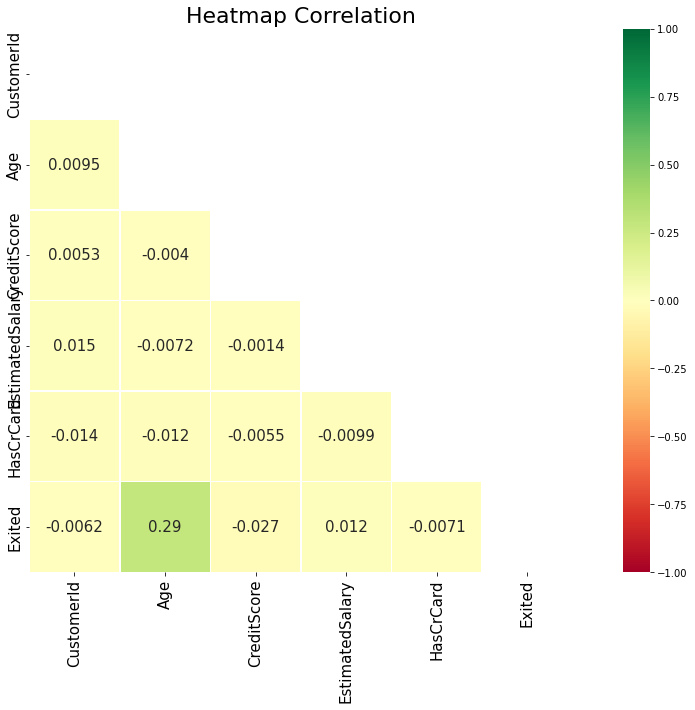

In [ ]:
import seaborn as sns
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Pada heatmap correlation diatas terlihat bahwa variabel yang berpengaruh terhadap churn atau tidaknya customer adalah Age, CreditScore, dan EstimatedSalary.

* Age berkorelasi positif dengan exited customer artinya semakin tua customer tersebut semakin besar kemungkinannya untuk churn
* CreditScore berkorelasi negatif dengan exited customer artinya semakin kecil CreditScore maka semakin besar kemungkinannya untuk churn
* EstimatedSalary berkorelasi positif dengan exited customer, meskipun variabel ini lebih kecil korelasinya diantara Age dan CreditScore. Variabel ini tetap memiliki pengaruh.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Churn')

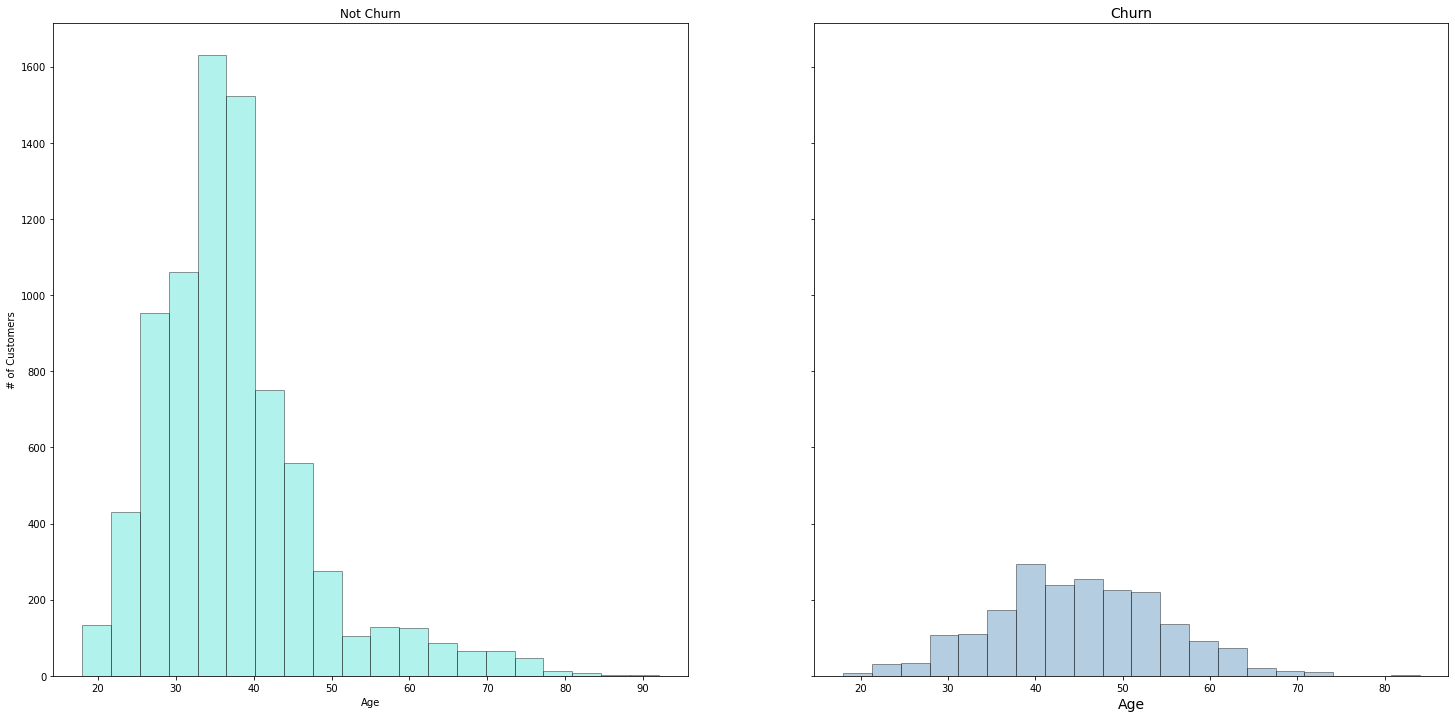

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = [25,12])

ax = sns.distplot(df[df['Exited'] == 0]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age')
ax.set_title('Not Churn')

ax = sns.distplot(df[df['Exited'] == 1]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Age',size = 14)
ax.set_title('Churn',size = 14)

Dari histogram diatas, nasabah yang berumur 50 tahun ke atas lebih besar kemungkinannya untuk churn daripada yang berusia 50 tahun ke bawah. Mengapa demikian?

Ini dikarenakan pada histogram sebelah kiri kita dapat melihat nasabah yang tidak churn terdistribusi dari umur 25 s.d. 45 tahun dan yang berumur 55 tahun keatas memiliki proporsi yang kecil. Ini artinya proporsi histogram churn di atas pada umur yang lebih tua lebih tinggi dibandingkan yang berumur muda.

In [ ]:
import plotly.express as px

In [ ]:
df["Exited"].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
x = pd.DataFrame({'count': [df[df['Exited'] == 0].shape[0], df[df['Exited'] == 1].shape[0]],
                   'churn': ['Not Churn', 'Churn']})
px.pie(x, values='count', names='churn', title='Churn Population')

Dapat terlihat bahwa 79% nasabah bank masih aktif. Sementara 20% lainnya telah berhenti menjadi nasabah bank. Berdasarkan hasil ini juga menunjukkan bahwa dataset imbalanced dan akan dilakukan SMOTE data pada tahap Modeling.

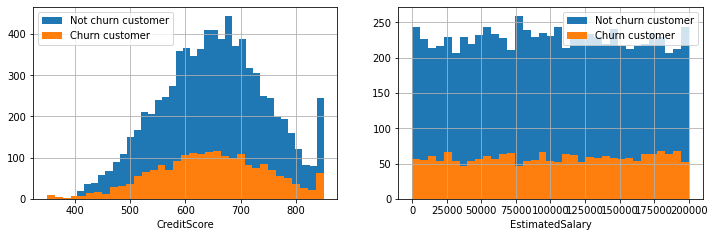

In [ ]:
num_feature = ['CreditScore','EstimatedSalary']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(num_feature, 1):
    plt.subplot(3, 2, i)
    df[df.Exited == 0][feature].hist(bins=35, label='Not churn customer', alpha=1)
    df[df.Exited == 1][feature].hist(bins=35, label='Churn customer', alpha=1)
    plt.legend()
    plt.xlabel(feature)

Pada histogram CreditScore diatas dapat terlihat bahwa persebaran churn customer pada credit score 600 hampir sama dengan customer churn yang memiliki credit skor 700. Padahal dapat dilihat bahwa customer yang tidak churn dengan credit score 700 sedikit lebih banyak ketimbang yang memiliki credit score 600

Sedangkan untuk EstimatedSalary terlihat bahwa persebaran antara customer yang churn dan tidak menyebar hampir merata. Meskipun begitu, variabel ini tetap memiliki pengaruh pada customer yang churn dan tidak

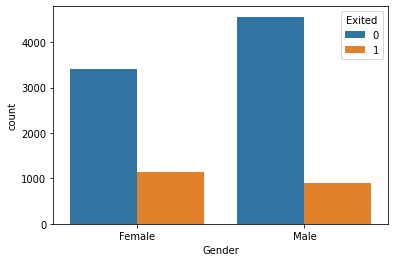

In [ ]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

Pada visualisasi di atas terlihat bahwa persentase customer perempuan lebih besar peluangnya untuk churn daripada customer pria. Meskipun proporsi antara customer non-churn pria & wanita, lebih banyak pria.

Dikarenakan pada visualisasi heatmap correlation di atas, CustomerID & HsCrCard tidak menunjukkan hubungan yang kuat dengan variabel Exited maka kolom CustomerID & HsCrCard akan di-drop. Drop kolom akan dilakukan pada tahap **Preprocessing**.

In [ ]:
df.groupby(['Exited']).count()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard
Exited,,,,,,
0,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037


In [ ]:
df.CustomerId.nunique()

10000

## Simplifikasi Column Name

Mengsimplifikasi nama-nama kolom agar memproses data menjadi lebih mudah.
1.   CustomerId = X1
2.   Gender = X2
3. Age = X3
4. CreditScore = X4
5. EstimatedSalary = X5
6. HasCrCard = X6
7. Exited = Y


In [ ]:
df.rename(columns={'CustomerId' : 'X1', 'Gender':'X2',
       'Age':'X3',
       'CreditScore':'X4', 'EstimatedSalary':'X5', 'HasCrCard':'X6',
       'Exited':'Y'}, inplace=True)

## Checking Multicolinearity


In [ ]:
df

,X1,X2,X3,X4,X5,X6,Y
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0
...,...,...,...,...,...,...,...
9995,15606229,Male,39,771,96270.64,1,0
9996,15569892,Male,35,516,101699.77,1,0
9997,15584532,Female,36,709,42085.58,0,1
9998,15682355,Male,42,772,92888.52,1,1


Text(0.5, 1.0, 'Correlation Matrix antara variable X')

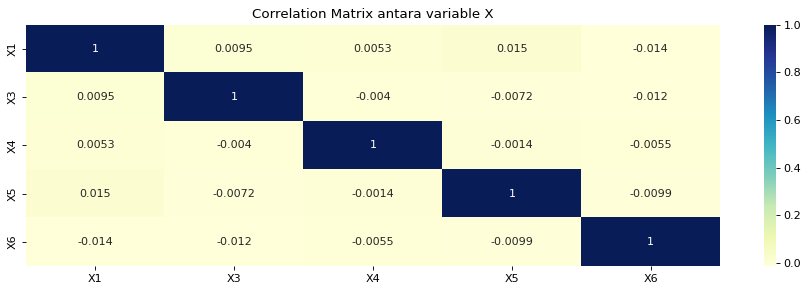

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:,'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Dari visualisasi multikolinearitas diatas terlihat bahwa tidak ada hubungan yang kuat antar hubungan Independent Variable (X)

# **Data Preprocessing**

## Drop Column 

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

In [ ]:
df = df.drop(['X1', 'X6'], axis=1)

## Check missing values

In [ ]:
df.isnull().sum()

X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64

## Check duplicate values

In [ ]:
df[df.duplicated(keep=False)]

,X2,X3,X4,X5,Y


## Check outlier

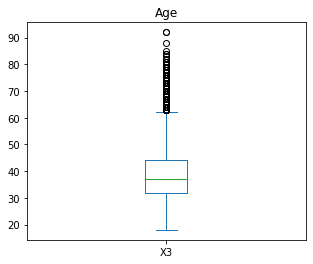

In [ ]:
df['X3'].plot(kind='box', title='Age', figsize=(5,4))

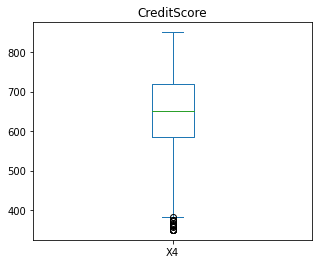

In [ ]:
df['X4'].plot(kind='box', title='CreditScore', figsize=(5,4))

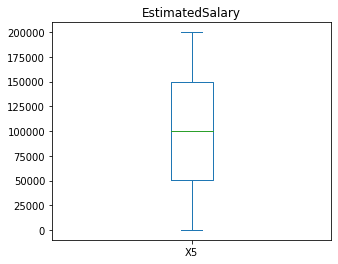

In [ ]:
df['X5'].plot(kind='box', title='EstimatedSalary', figsize=(5,4))

Dari hasil pengecekan diketahui terdapat outlier pada 'Age' dan 'CreditScore'

## Removing Outlier 'Age / X3'

In [ ]:
q1 = np.percentile(df.X3, 25) 
q3 = np.percentile(df.X3, 75)
iqr = q3-q1
lower_bound_age = q1 - (1.5*iqr)
upper_bound_age = q3 + (1.5*iqr)

In [ ]:
lower_bound_age

14.0

In [ ]:
upper_bound_age

62.0

In [ ]:
df_Age_outlier = df[(df['X3'] < lower_bound_age) | (df['X3'] > upper_bound_age)]
df_Age_outlier

,X2,X3,X4,X5,Y
58,Female,66,511,1643.11,1
85,Female,75,652,114675.75,0
104,Female,65,670,177655.68,1
158,Female,73,646,104719.66,0
181,Male,65,510,48071.61,0
...,...,...,...,...,...
9753,Male,68,656,186574.68,0
9765,Male,64,445,43678.06,0
9832,Female,64,595,89935.73,1
9894,Female,77,521,49054.10,0


In [ ]:
lower_age = np.where((df['X3'] < lower_bound_age))
upper_age = np.where((df['X3'] > upper_bound_age))

In [ ]:
lower_age

(array([], dtype=int64),)

In [ ]:
upper_age

(array([  58,   85,  104,  158,  181,  230,  234,  243,  252,  310,  364,
         371,  385,  399,  559,  567,  602,  612,  658,  678,  736,  766,
         769,  807,  811,  823,  859,  884,  888,  948,  952,  957,  963,
         969, 1009, 1039, 1040, 1055, 1205, 1234, 1235, 1246, 1252, 1278,
        1285, 1342, 1387, 1407, 1410, 1439, 1457, 1519, 1543, 1607, 1614,
        1790, 1810, 1866, 1901, 1904, 1907, 1933, 1981, 2002, 2012, 2039,
        2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458,
        2459, 2553, 2615, 2670, 2713, 2717, 2760, 2772, 2778, 2791, 2855,
        2877, 2901, 2908, 2925, 2926, 3033, 3054, 3110, 3142, 3192, 3203,
        3229, 3311, 3314, 3317, 3346, 3366, 3368, 3378, 3382, 3384, 3387,
        3396, 3434, 3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3602,
        3646, 3647, 3651, 3690, 3691, 3702, 3728, 3733, 3761, 3813, 3826,
        3880, 3881, 3888, 3909, 3910, 3927, 3940, 3980, 3994, 4010, 4025,
        4048, 4051, 4142, 4147, 4162, 

In [ ]:
df.drop(upper_age[0], inplace = True)
df.drop(lower_age[0], inplace = True)

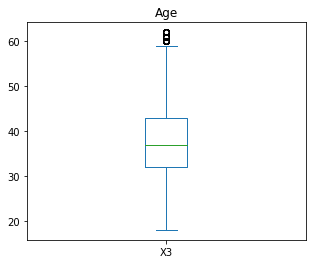

In [ ]:
df['X3'].plot(kind='box', title='Age', figsize=(5,4))

## Removing Outlier 'CreditScore / X4'

In [ ]:
q1 = np.percentile(df.X4, 25) 
q3 = np.percentile(df.X4, 75)
iqr = q3-q1
lower_bound_credit = q1 - (1.5*iqr)
upper_bound_credit = q3 + (1.5*iqr)

In [ ]:
df_Credit_outlier = df[(df['X4'] < lower_bound_credit) | (df['X4'] > upper_bound_credit)]
df_Credit_outlier

,X2,X3,X4,X5,Y
7,Female,29,376,119346.88,1
942,Female,46,376,157333.69,1
1193,Female,28,363,100615.14,1
1405,Female,44,359,146955.71,1
1631,Male,54,350,191973.49,1
1838,Male,39,350,123602.11,1
1962,Female,52,358,141959.11,1
2473,Female,57,351,169621.69,1
2579,Male,30,365,81537.85,1
8154,Male,42,367,168816.73,1


In [ ]:
lower_credit = np.where((df['X4'] < lower_bound_credit))
upper_credit = np.where((df['X4'] > upper_bound_credit))

In [ ]:
upper_credit

(array([], dtype=int64),)

In [ ]:
lower_credit

(array([   7,  913, 1155, 1358, 1576, 1781, 1900, 2395, 2500, 7862, 8411,
        8448, 9024, 9279]),)

In [ ]:
df.drop(upper_credit[0], inplace = True)
df.drop(lower_credit[0], inplace = True)

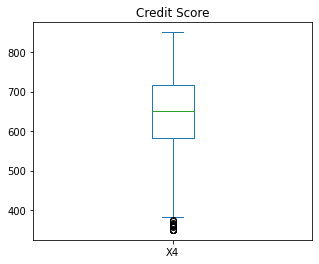

In [ ]:
df['X4'].plot(kind='box', title='Credit Score', figsize=(5,4))

## Feature Engineering

### Encode Column 'Gender/X2'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['X2'] = le.fit_transform(df['X2'])

Pada bagian ini Gender (X2) yang berupa string di-encode menjadi integer. Female = 0 dan Male = 1

In [ ]:
df.head()

,X2,X3,X4,X5,Y
0,0,42,619,101348.88,1
1,0,41,608,112542.58,0
2,0,42,502,113931.57,1
3,0,39,699,93826.63,0
4,0,43,850,79084.10,0


### Split data for modeling

In [ ]:
df_train = df.copy()
df_train.head()

,X2,X3,X4,X5,Y
0,0,42,619,101348.88,1
1,0,41,608,112542.58,0
2,0,42,502,113931.57,1
3,0,39,699,93826.63,0
4,0,43,850,79084.10,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_train.drop(columns=['Y']).copy()
y = df_train['Y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7220
2407


### SMOTE Imbalanced Data

In [ ]:
y_train.value_counts()

0    5776
1    1444
Name: Y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_smote.value_counts()

0    5776
1    5776
Name: Y, dtype: int64

### Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_smote[:])
X_smote[:] = scaler.transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])

# **Modeling**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


log = LogisticRegression()
log.fit(X_smote, y_smote)
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1891
           1       0.39      0.62      0.48       516

    accuracy                           0.71      2407
   macro avg       0.63      0.68      0.64      2407
weighted avg       0.77      0.71      0.73      2407



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1891
           1       0.35      0.59      0.44       516

    accuracy                           0.67      2407
   macro avg       0.60      0.64      0.60      2407
weighted avg       0.75      0.67      0.70      2407



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_smote, y_smote)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1891
           1       0.33      0.52      0.40       516

    accuracy                           0.67      2407
   macro avg       0.58      0.61      0.59      2407
weighted avg       0.73      0.67      0.69      2407



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1891
           1       0.37      0.55      0.44       516

    accuracy                           0.70      2407
   macro avg       0.61      0.65      0.62      2407
weighted avg       0.75      0.70      0.72      2407



## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1891
           1       0.39      0.65      0.49       516

    accuracy                           0.71      2407
   macro avg       0.64      0.69      0.64      2407
weighted avg       0.78      0.71      0.73      2407



# **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score    
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import mean_absolute_error 

In [ ]:
def eval(model_name):
  if model_name == 'Logistic Regression':
    model = log
  elif model_name == 'KNN':
    model = knn
  elif model_name == 'Decision Tree':
    model = tree
  elif model_name == 'Random Forest':
    model = rf
  else:
    model = xgb
  y_pred = model.predict(X_test)         
  print(model_name)
  print('Accuracy score (training): {0:.3f}'.format(model.score(X_smote, y_smote)))
  print('Accuracy score (test): {0:.3f}'.format(model.score(X_test, y_test)))
  print('MSE: {0:.3f}'.format(mean_squared_error(y_test,y_pred)))
  print('MAE: {0:.3f}'.format(mean_absolute_error(y_test,y_pred)))
  print('RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
  print('')

## Evaluation each model

In [ ]:
list_model = ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost']

for model in list_model:
  eval(model)

Logistic Regression
Accuracy score (training): 0.728
Accuracy score (test): 0.707
MSE: 0.293
MAE: 0.293
RMSE: 0.541

KNN
Accuracy score (training): 0.808
Accuracy score (test): 0.673
MSE: 0.327
MAE: 0.327
RMSE: 0.572

Decision Tree
Accuracy score (training): 1.000
Accuracy score (test): 0.668
MSE: 0.332
MAE: 0.332
RMSE: 0.576

Random Forest
Accuracy score (training): 1.000
Accuracy score (test): 0.700
MSE: 0.300
MAE: 0.300
RMSE: 0.548

XGBoost
Accuracy score (training): 0.748
Accuracy score (test): 0.707
MSE: 0.293
MAE: 0.293
RMSE: 0.542



Berdasarkan hasil evaluasi, Logistic Regression dan XGBoost memiliki hasil yang paling baik. Selanjutnya bisa kita pertimbangkan dengan melihat recall dari masing-masing model

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1891
           1       0.39      0.62      0.48       516

    accuracy                           0.71      2407
   macro avg       0.63      0.68      0.64      2407
weighted avg       0.77      0.71      0.73      2407



In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1891
           1       0.39      0.65      0.49       516

    accuracy                           0.71      2407
   macro avg       0.64      0.69      0.64      2407
weighted avg       0.78      0.71      0.73      2407



Berdasarkan hasil evaluasi XGBoost adalah model terbaik yang akan digunakan

## Confusion Matrix - Regression Logistic

In [ ]:
from sklearn.metrics import confusion_matrix

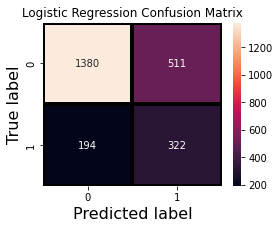

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

Logistic Regression Confusion Matrix:
* TN: 1380
* TP: 321
* FN: 195
* FP: 511

Disini dapat dilihat bahwa model regression logistic memprediksi benar untuk customer non-churn (TN) sebesar 1380 sementara customer churn sebesar 321. Dapat terlihat pula model salah memprediksi customer churn hingga 195.

Disini yang kita perhatikan adalah perbandingan antara TP dan FN-nya karena kita mencari skor Recall yang paling tinggi. Semakin kecil FN-nya maka semakin bagus pula Recallnya dikarenakan model dapat lebih akurat memprediksi customer yang churn.

Kenapa FN-nya harus kecil? Dikarenakan FN berarti model memprediksi customer yang tidak churn padahal sebenarnya customer tersebut berpeluang lebih besar untuk churn

## Confusion Matrix - XGBoost Classifer

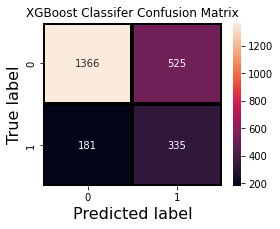

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost Classifer Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

XGBoost Classifier Confusion Matrix:
* TN: 1386
* TP: 331
* FN: 185
* FP: 505

Pada XGBoost Classifier terlihat skor Confusion Matrix pada True Negative dan True Positive lebih tinggi dibandingkan yang ada pada Logistic Regression. Ini artinya skor akurasi prediksi XGBoost Classifier lebih baik daripada Logistic Regression.

Selain itu yang menjadi fokus pada Confusion Matrix ini adalah Recallnya. Seperti yang diketahui bahwa False Negative atau kesalahan prediksi customer yang tidak churn padahal churn semakin kecil maka Skor Recallnya akan semakin tinggi pula. Ini pun dapat dilihat bahwa FN XGBoost Classifier lebih kecil dibandingkan Logistic Regression, tentu skor recallnya juga lebih baik. 

Tentunya akan fatal bukan meskipun akurasi prediksi kita tinggi namun recall-nya rendah dikarenakan model salah memprediksi nasabah tidak churn padahal churn.

# **Deployment**

In [ ]:
import pickle

In [ ]:
# saving the model  
with open('/content/drive/My Drive/model_example/model.pkl','wb') as file:
    pickle.dump(xgb, file)

In [ ]:
model_columns = list(X.columns)
model_columns

['X2', 'X3', 'X4', 'X5']

In [ ]:
with open('/content/drive/My Drive/model_example/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

## Testing data

In [ ]:
trained_load_model = pickle.load(open("/content/drive/My Drive/model_example/model.pkl", "rb"))
trained_load_model

XGBClassifier(missing=nan)

In [ ]:
data = {
    'X2':[0],
    'X3':[42],
    'X4':[619],
    'X5':[101348.88]
}
data = pd.DataFrame(data)
data

,X2,X3,X4,X5
0,0,42,619,101348.88


In [ ]:
data = pd.DataFrame(scaler.transform(data),columns = data.columns)
data

,X2,X3,X4,X5
0,-0.844653,0.223081,-0.330683,0.011566


In [ ]:
trained_load_model.predict(data)[0]

1

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## XGBoost

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
xgb = XGBClassifier()
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=1000,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
#random_search.fit(X_smote,y_smote)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 0.0 seconds.


In [ ]:
random_search.best_estimator_

AttributeError: ignored

In [ ]:
xgb1 = XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15)
xgb1.fit(X_smote,y_smote) 

In [ ]:
y_pred_xgb1 = xgb1.predict(X_test)
print(classification_report(y_test, y_pred_xgb1))

## Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_smote, y_smote)

In [ ]:
rf_random.best_params_

In [ ]:
rf1 = RandomForestClassifier(n_estimators=400, max_depth=10,min_samples_leaf=1,max_features='sqrt',
                             min_samples_split=5, criterion='gini')
rf1.fit(X_smote,y_smote) 

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
print(classification_report(y_test, y_pred_rf1))